In [1]:
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Flatten,Dense,Dropout
from tensorflow.keras.utils import normalize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import random
import cv2
import os

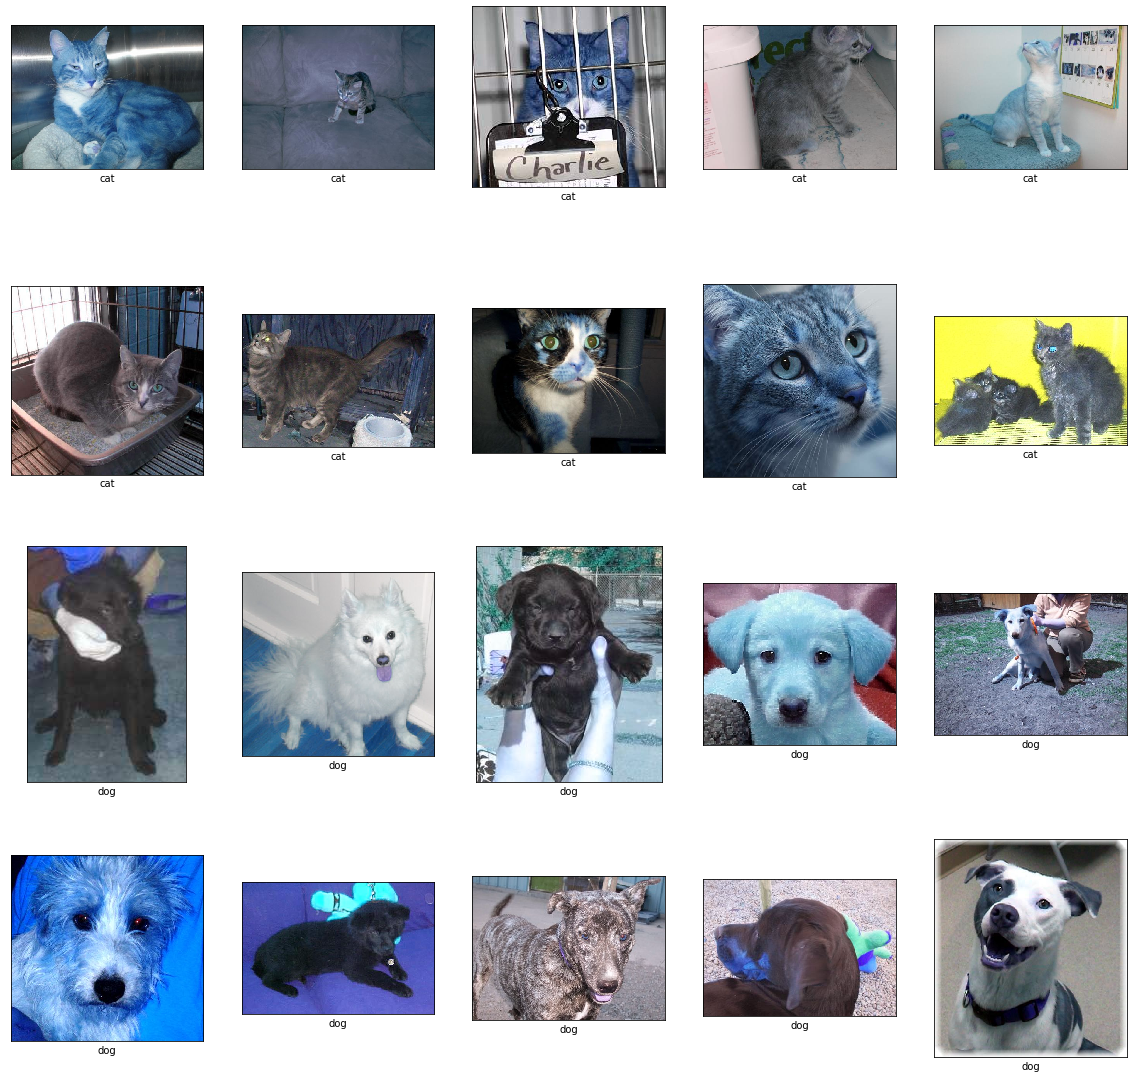

In [2]:
# to display some images foreach categorie in the dataset
plt.figure(figsize=(20,20))

path_root = "dataset"
i = 0

for categorie in os.listdir(path_root):
    path_of_categories = path_root + os.sep + categorie
    for item in os.listdir(path_of_categories):
        plt.subplot(4,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(cv2.imread(path_of_categories + os.sep + item))
        plt.xlabel(categorie)
        i = i + 1
        if i%10 == 0: break

plt.show()

In [3]:
# to reseize all images in the dataset before put it as input in DNN
min_width = np.inf
min_height = np.inf
max_width = -np.inf
max_height = -np.inf

counter_unique_width = dict()
counter_unique_height = dict()
counter = 0

for categorie in os.listdir(path_root):
    items = os.listdir(path_root + os.sep + categorie)
    for item in items:
        try:
            img = cv2.imread(path_root + os.sep + categorie + os.sep + item,1)
            width,height,_ = img.shape
            if width < min_width: min_width = width
            if height < min_height: min_height = height
            if width > max_width: max_width = width
            if height > max_height: max_height = height
            
            if counter_unique_width.get(str(width)) is None:
                counter_unique_width[str(width)] = 1
            else:
                counter_unique_width[str(width)] += 1
            if counter_unique_height.get(str(height)) is None:
                counter_unique_height[str(height)] = 1
            else:
                counter_unique_height[str(height)] += 1
            
            counter += 1
        except Exception as e:
            print("Error",e.args)
            pass

print("number of images in the dataset is:",counter,"images")
        
print("min width:",min_width)
print("min height:",min_height)
print("max width:",max_width)
print("max height:",max_height)

print("[+] width information")
for i in counter_unique_width:
    print(i,"=>",counter_unique_width[i])
print("[+] height information")
for i in counter_unique_height:
    print(i,"=>",counter_unique_height[i])

Error ("'NoneType' object has no attribute 'shape'",)
number of images in the dataset is: 999 images
min width: 72
min height: 80
max width: 500
max height: 500
[+] width information
360 => 10
375 => 230
240 => 25
489 => 1
346 => 8
500 => 154
200 => 11
498 => 1
160 => 1
437 => 1
397 => 5
157 => 1
319 => 1
320 => 4
400 => 17
477 => 2
374 => 7
458 => 3
93 => 1
149 => 1
464 => 3
343 => 3
303 => 3
438 => 1
255 => 3
312 => 1
335 => 4
333 => 8
94 => 1
389 => 2
120 => 2
377 => 9
336 => 9
325 => 2
130 => 1
450 => 6
378 => 4
249 => 3
376 => 3
330 => 1
331 => 1
480 => 9
379 => 2
338 => 4
350 => 1
225 => 5
268 => 3
308 => 3
262 => 6
454 => 1
281 => 3
300 => 21
234 => 2
173 => 2
396 => 1
270 => 6
328 => 3
259 => 1
214 => 1
382 => 5
144 => 2
286 => 1
304 => 3
431 => 2
357 => 4
236 => 2
358 => 3
287 => 2
244 => 3
72 => 1
434 => 1
475 => 1
158 => 1
210 => 3
258 => 2
373 => 3
273 => 1
443 => 3
410 => 2
226 => 2
90 => 3
405 => 2
451 => 1
332 => 12
344 => 3
352 => 2
418 => 1
384 => 2
182 => 1
250 => 4
2

In [4]:
# resize all images in same size and split the data
MAX_WIDTH = 200
MAX_HEIGHT = 200
TRAIN_SIZE = 0.8

i,nb_of_images,x_data,y_data = 0,0,list(),list()

for categorie in os.listdir(path_root):
    path = path_root + os.sep + categorie
    for item in tqdm(os.listdir(path)):
        try:
            img = cv2.imread(path + os.sep + item,1)
            x_data.append(cv2.resize(img,(MAX_WIDTH,MAX_HEIGHT)))
            y_data.append(i)
            nb_of_images += 1
        except Exception as e:
            print(e)
            pass
    i += 1

# merge data of cat,dog
data = [[i,j] for i,j in zip(x_data,y_data)]
del x_data,y_data
random.shuffle(data)

X = np.array([i for i in np.array(data)[:,0]])
y = np.array(data)[:,1]
del data

# splitting data
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=TRAIN_SIZE)
del X,y

# # normalize data
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.int)
y_test = y_test.astype(np.int)
X_train = normalize(X_train)
X_test = normalize(X_test)

print("size of X_train:",X_train.shape)
print("size of y_train:",y_train.shape)
print("size of X_test:",X_test.shape)
print("size of y_train:",y_test.shape)

 50%|████▉     | 249/500 [00:01<00:01, 193.50it/s]

OpenCV(4.2.0) /io/opencv/modules/imgproc/src/resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



100%|██████████| 500/500 [00:01<00:00, 253.03it/s]


size of X_train: (799, 200, 200, 3)
size of y_train: (799,)
size of X_test: (200, 200, 200, 3)
size of y_train: (200,)


In [5]:
model = Sequential()

model.add(Flatten(input_shape=(MAX_WIDTH,MAX_HEIGHT)))
model.add(Dense(2048,activation="relu"))
model.add(Dense(1024,activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.summary()

history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=32,verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 40000)             0         
_________________________________________________________________
dense (Dense)                (None, 2048)              81922048  
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 1

ValueError: in user code:

    /home/pfisher/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    /home/pfisher/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/pfisher/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/pfisher/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/pfisher/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:531 train_step  **
        y_pred = self(x, training=True)
    /home/pfisher/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:927 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    /home/pfisher/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:277 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /home/pfisher/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/network.py:719 call
        convert_kwargs_to_constants=base_layer_utils.call_context().saving)
    /home/pfisher/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/network.py:888 _run_internal_graph
        output_tensors = layer(computed_tensors, **kwargs)
    /home/pfisher/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:886 __call__
        self.name)
    /home/pfisher/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer dense is incompatible with the layer: expected axis -1 of input shape to have value 40000 but received input with shape [None, 120000]
